# TW233MI - Régularisation et Optimisation des modèles

## Lab 1: Introduction to the Machine Learning Pipeline

Author: Jesse READ, Michel DEUDON

### 1 Introduction

The goal of this lab is to demonstrate the machine learning pipeline. We give a step by step overview of
a typical machine learning task, and at each step describe the subtasks that need to be performed. For
further information regarding the concepts relevant to this lab, see the lecture slides.

### 2 The Task

Some data is available in the data folder. This data consists of rows of measurements associated with
cell growth in Scots pine trees monitored in the commune of Walscheid in France. Each row corresponds
to the data of one week. The features are the week number, and the average measured temperature and
soil moisture over that week. The final column denotes the number of new cells (known as tracheids)
measured during that week (the number is an average over measurements from several trees).
Counting cells involves manually extracting micro-core samples from the tree several times a week,
and counting the cells under a microscope. Therefore it would be time saving and beneficial if a computational
model was constructed, such that an estimate of growth could be made automatically given the
environmental measurements (which are easily and automatically obtainable), without having to manually
extract samples. Furthermore, the model could be analyzed for greater understanding of growth
drivers. In this lab we will build such a model.

### 3 Implementation of a Machine Learning Pipeline

In this section, a machine learning pipeline will be implemented to load and preprocess the data, and
from this data to build and evaluate a regression model. Each of the following subsections include
tasks to be completed. In each case, you will need to complete code in this notebook. It operates on the accompanying data supplied in the files `data_train.csv` and `data_test.csv` located in the `data/` folder. To run the pipeline, simply run all cells in this notebook.

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
from scipy.linalg import inv

#### 3.1 Loading and inspecting the data

The training data is loaded with the following Python code. Note that the final column contains the
target variable (also called the label attribute, or output), and the other columns contain the features (also
called sometimes the input attributes). These are stored in variables X (the features) and y (the target).

In [2]:
# Load the data
data = np.loadtxt('data/data_train.csv', delimiter=',')

# Prepare the data
X = data[:,0:-1]
y = data[:,-1]
#y[y >= 8] = 0       # <-- uncomment for data cleaning (outlier)

The distribution of each variable can be inspected by using Matplotlib’s `hist` function to create a
histogram. The following code demonstrates how to create and show a histogram of 10 bins, from the
data of the second feature (temperature).

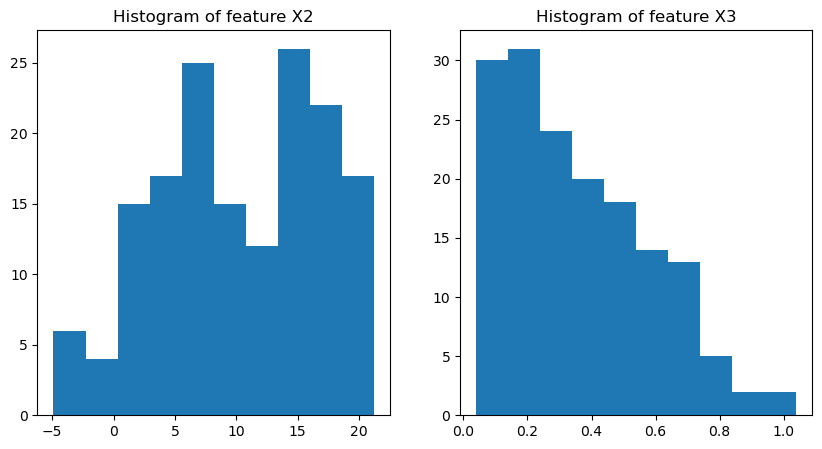

In [3]:
# Inspect the data
plt.figure(1, figsize=(10,5))
plt.subplot(121)
plt.hist(X[:,1], 10)
plt.title("Histogram of feature X2")

plt.subplot(122)

### TODO.
# Inspect the distribution of other variables
### END TODO

plt.title("Histogram of feature X3")
plt.show()

Notice that in Python the first feature is indexed at 0, whereas typically we refer to X1 in mathematical
notation. Therefore the second feature is indexed at 1. The data can also be plotted for visual inspection. This is demonstrated for two attributes below.

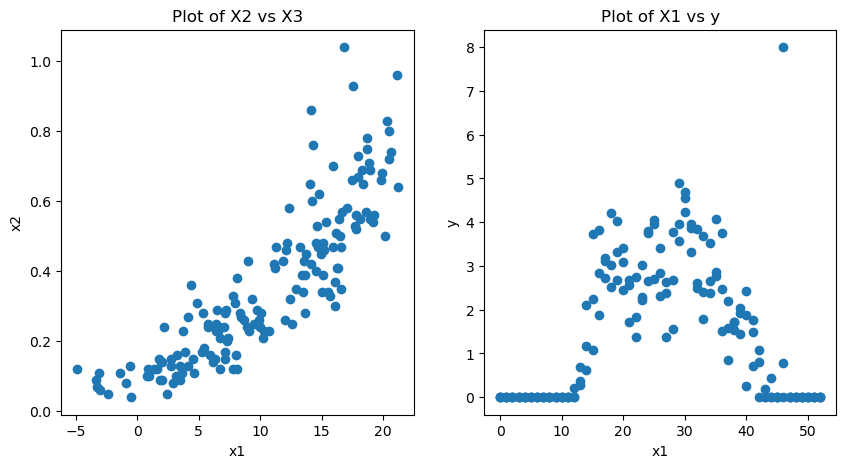

In [4]:
plt.figure(1, figsize=(10,5))

plt.subplot(121)
plt.plot(X[:,1],X[:,2], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Plot of X2 vs X3")

plt.subplot(122)

### TODO
# Plot X1 (week number) vs the target Y
# Hint: From the correlation between X1 (week number) and the target variable (number of cells),
# you should be able to see how the growth season starts at about the 12th week of the year,
# peaks in the summer months, before ceasing in the final months of the year.
### END TODO

plt.xlabel('x1')
plt.ylabel('y')
plt.title("Plot of X1 vs y")

plt.show()

#### 3.2 Preprocessing

Preprocessing is a fundamental step in the machine learning pipeline. It can involve cleaning the data,
dealing with missing values, removing outliers, dimensionality reduction, feature selection and feature
engineering. Usually preprocessing is guided by the data exploration process (inspecting the data). For
example, there appears to be at outlier in the target column, visible in Figure 1d, possible caused by an
‘8’ being recorded instead of a ’0’. We will come back to this later at evaluation time.
In the data exploration phase it was also noticeable that the attributes were of different scales. A
common technique is to standardize each attribute to mean 0 and standard deviation 1 so that each
variable will be considered equally.

In [5]:
### TODO
# Standardize the data of each of the input attributes.
# Hint: NumPy has a function `mean`. Calling mean(X,axis=0) will return a vector of means, one for each column.
# The function `std` can be used in a similar way for the standard deviation.
#
#
#
### END TODO

In the next section a linear model will be used. However, we observed in the plot of X1 vs y that the relationship
of at least the X1 feature is non-linear with respect Y . This motivates us to use polynomial basis
functions to expand the feature space in a way that it produces a new feature space that can be fitted
well with a linear model. This has been included in the preprocessing via the function `poly_exp` below, for which the second parameter indicates the degree to the polynomial. Using degree 2
would produce a new feature space
$z_i = [x_1; x_2; x_3; x_1^2; x_2^2; x_3^2]$
for the i-th instance. Finally, a column of 1s is added to the new input feature space so that the intercept
of a linear model does not need to be calculated separately.

In [6]:
def poly_exp(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = np.column_stack([X,X[:,0:D]**d])
    return X

In [7]:
# Feature creation
degree = 2
Z = poly_exp(X,degree)
Z = np.column_stack([np.ones(len(Z)), Z])

#### 3.3 Building a model

This is a regression problem, since the target label is continuous. We will use ordinary least squares
regression. The ordinary least squares estimator of coefficients is $\hat{\theta} = (Z^T Z)^{-1} Z^T y$.

In [8]:
### TODO
# Implement ordinary least squares as Python code using the dot function in
# NumPy, so as to obtain a vector of coefficients. Print out the coefficients using
# the print function. Hint: Since we inserted an extra column of 1s the intercept is
# calculated automatically into w[0] (where w is whatever name you chose for the vector of coefficients).
# w = 
print("w = ", w)
### END TODO

w =  [ 1.902  0.117  0.691  0.031 -0.676  0.24   0.031]


So far, you should obtain something like the following (w values have been rounded).

w = [ 1.902 0.117 0.691 0.031 -0.676 0.24 0.031]

#### 3.4 Loading and processing the test data

We now have a model that can supply predictions given new data instances, i.e., given a new set of
measurements, we can estimate the number of cells of new growth for that week. But before deploying
a model, we should first test it to know how useful it is. To test the model we first must obtain and
process test data. It is important to conduct an identical preprocessing on the `test_data` as the train data.
In this case, standardization, feature expansion, and adding of a column of ones. The true labels of the
test data should be held aside and not used in any process except for model evaluation.

In [ ]:
### TODO

# Load and preprocess the test data (data_test.csv) as done for the train data,
# but use different variable names (for example, X_test and y_test). Note that the
# preprocessing is not recalculated on the test data, we standardize using the same
# mean and standard deviation as estimated from the training data.

data = np.loadtxt('data/data_test.csv', delimiter=',')

# Preparation and preprocessing 
X_test = data[:,0:-1]
X_test = (X_test - m) / s
Z_test = poly_exp(X_test,2)
Z_test = np.column_stack([np.ones(len(Z_test)), Z_test])
y_test = data[:,-1]

# Prediction
y_pred = np.dot(Z_test,w)
### END TODO

#### 3.5 Evaluation and Comparison

The estimator $\hat{\theta}$ can now be evaluated using the test data. Namely, we make predictions $\hat{y} = Z\hat{\theta}$, using
the Python code $y\_pred = dot(Z\_test,\theta)$ (where w is the name you chose for the coefficient vector).
We then evaluate the predictions. For this task we use the mean squared error as the loss metric:
$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

In [10]:
def MSE(yt,yp):
    
    ### TODO
    # Implement the MSE calculation as Python code. This involves comparing y test and y pred
    # Hints: the number of examples in a vector can be obtained by the len function;
    # the sum function in NumPy will sum the values of a vector.
    #
    #
    ### END TODO
    
    return 0

In [11]:
### TODO
# Print out the value obtained on y_test and y_pred
# Additionally calculate the MSE where all predictions for test examples are simply
# the mean of Y in the training data (baseline model)
#
#
### END TODO

MSE on test data   0.5461913315483614
MSE baseline       1.7691746529013892


You should obtain something like:
MSE on test data 0.546 |
MSE baseline 1.769 using 2nd degree polynomial features

In [12]:
### TODO
# What is the change to MSE if we replace the outlier (see Section 3.1 first cell) with a different
# value (e.g., 0)? By making other changes in the preprocessing step, can you
# improve on the best result so far?
### END TODO

Why is it important to use a test set for evaluation and not just simply measure the MSE on the training
data that we had originally? The answer is, to avoid overfitting. Overfitting can be demonstrated by
comparing results on the training and test sets for different parameter configurations. When we vary the degree of the polynomial expansion. On the training data we can achieve
better and better results with more complexity, but in reality, anything more than a degree 5 polynomial
is clearly overfitting, and the model is worse on new data that it hasn’t seen before.

In [13]:
degrees = [0,1,2,3,4,5,6,7]
MSE_train = np.zeros(len(degrees))
MSE_test = np.zeros(len(degrees))

### TODO
# Find the optimal degree of polynomial (feature creation), achieving the lowest MSE_test
# Note: Beyond this degree, the MSE_test increases. This is called overfitting in ML.
# Hints: put the test procedure in a loop, incrementing the degree of polynomial in the expansion each time, then use
# plotting functions as demonstrated in the earlier tasks; at each iteration of the loop
# you will need to obtain predictions on both the training and test data using your
# MSE function.
#
#
#
#

#print(MSE_train)
#print(MSE_test)
### END TODO